<a href="https://colab.research.google.com/github/priyanka742/machine_learning/blob/main/Q5_kmeans_%26_alggomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Agglomerative Clustering***

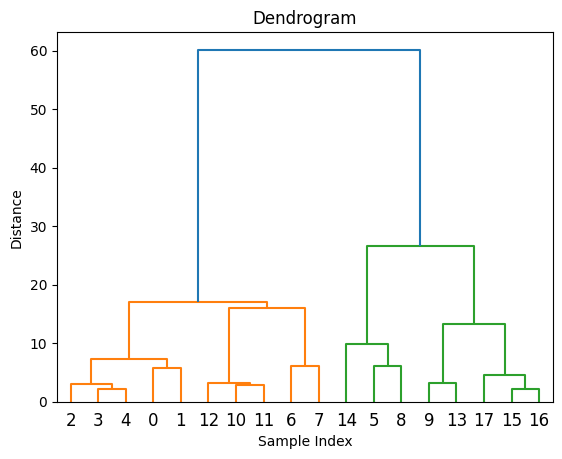

    X1  X2  cluster
0    2   6       10
1    5   1       11
2    7   4       14
3    9   6       17
4    7   7       12
5    4  22        8
6    6  14        9
7   12  15        4
8   10  23       15
9   18  25       13
10  14   4       16
11  16   6        7
12  13   7        5
13  17  22        3
14  11  30        6
15  23  28        1
16  25  29        2
17  27  26        0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your dataset from a CSV file using pd.read_csv
data = pd.read_csv("svm (1).csv")

X = data[['X1', 'X2']]

# Perform Agglomerative Clustering
# You can specify the number of clusters (n_clusters) or let the algorithm determine it.
# In this example, we let the algorithm determine the number of clusters using the 'ward' linkage method.
agglomerative = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=0.5)

# Fit the Agglomerative Clustering model to your data
agglomerative.fit(X)

# Get the cluster labels for each data point
labels = agglomerative.labels_

# Visualize the dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

data['cluster'] = labels

print(data[['X1', 'X2', 'cluster']])


k means

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/svm (1).csv")
#assign the number of cluster u want to create
num_clusters = 3

# Explicitly set the n_init parameter to avoid the warning
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame (optional)
data['Cluster'] = cluster_labels

# Plot the clusters (for 2D data)
if data.shape[1] == 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=cluster_labels, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'K-Means Clustering with {num_clusters} Clusters')
    plt.legend()
    plt.show()
else:
    print("Data has more than 2 features, cannot visualize clusters.")

Data has more than 2 features, cannot visualize clusters.


elbow method k means

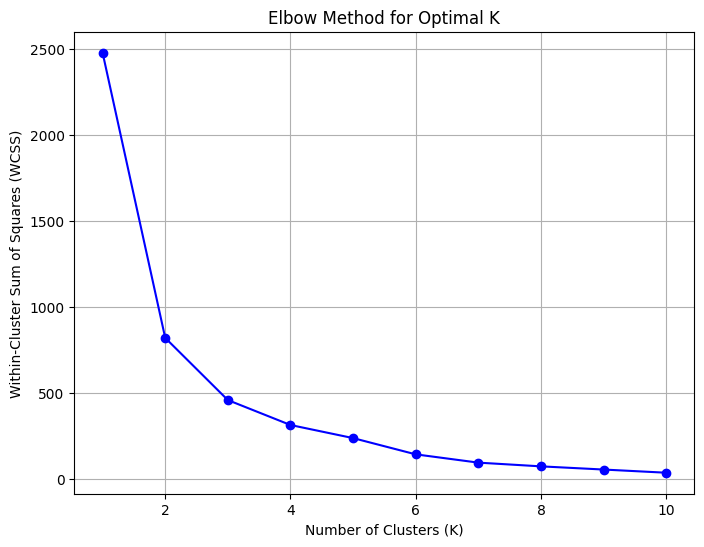

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load your dataset from a CSV file using pd.read_csv
# Replace "your_dataset.csv" with the actual path to your CSV file
data = pd.read_csv("/content/svm (1).csv")

# Assuming your dataset has features (no 'target' column)

# Initialize an empty list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Specify a range of values for K (number of clusters)
k_range = range(1, 11)  # You can adjust this range as needed

# Calculate WCSS for different values of K
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()